# 1st Dataset

In [85]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = pd.read_csv('pd_speech_features.csv', sep=',')
data = data.sort_values('id', ascending=True)
data = data.drop_duplicates(subset='id', keep='last')


data = data.groupby('id').mean().reset_index()

#Fazer a média das 3 medições
data = data.groupby('id').mean().reset_index()

print(data.shape)

(252, 755)


# Missing Values Imputation

Neste dataset não exisatem missing values.

In [86]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='constant', fill_value=-1, missing_values=np.nan, copy=True)
imp.fit(data.values)
mat = imp.transform(data.values)
data = pd.DataFrame(mat, columns=data.columns)
data.describe(include='all')

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,125.500000,0.515873,0.746697,0.700550,0.486142,326.996032,325.726190,0.006305,0.000388,0.002229,...,26.613394,21.599900,18.418657,13.596068,11.841895,11.823114,14.770652,14.827965,31.674841,0.746032
std,72.890329,0.500743,0.171182,0.070743,0.136822,102.168734,102.301876,0.001788,0.000745,0.002602,...,41.083364,30.546728,24.709837,19.497483,17.869859,15.939914,15.486337,14.084009,33.529630,0.436146
min,0.000000,0.000000,0.103480,0.543500,0.178730,80.000000,73.000000,0.002107,0.000014,0.000230,...,1.509800,1.531700,1.582900,2.120900,1.789500,1.884300,2.132600,2.148800,2.489600,0.000000
25%,62.750000,0.000000,0.769175,0.643838,0.385700,256.750000,255.750000,0.004978,0.000046,0.000925,...,2.451075,3.442225,3.638075,3.170650,3.051625,3.136000,3.923575,3.853775,4.253275,0.000000
50%,125.500000,1.000000,0.810510,0.696500,0.484915,314.500000,313.500000,0.006111,0.000074,0.001470,...,6.197000,8.320550,6.262650,4.817050,4.555350,4.807150,7.368650,7.801000,10.818350,1.000000
75%,188.250000,1.000000,0.832308,0.756568,0.578205,387.500000,386.500000,0.007434,0.000168,0.002332,...,32.315925,25.453775,21.609125,12.681975,9.608975,11.565000,20.673550,23.416000,61.075750,1.000000
max,251.000000,1.000000,0.907660,0.850700,0.849800,907.000000,905.000000,0.011601,0.003327,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.114200,61.379100,51.756300,120.317200,1.000000


# Normalization

Neste caso normalizamos ao valor unitário. To make sure that the different features take on similar ranges of values so that the classification algorithms can converge faster.

In [87]:
from sklearn.preprocessing import Normalizer

transf = Normalizer().fit(data)
norm_data = pd.DataFrame(transf.transform(data, copy=True), columns= data.columns)
norm_data.describe(include='all')

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,...,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02
mean,1.700927e-08,9.343776e-11,1.007960e-10,9.675651e-11,7.170123e-11,3.825857e-08,3.806422e-08,9.753927e-13,5.679794e-14,3.906625e-13,...,2.658403e-09,2.419078e-09,2.420275e-09,1.922459e-09,1.682616e-09,1.681545e-09,2.145241e-09,2.135304e-09,4.489677e-09,1.070996e-10
std,1.676605e-08,1.105372e-10,6.802810e-11,6.496926e-11,6.138831e-11,1.644316e-08,1.629858e-08,8.762127e-13,1.434438e-13,7.958482e-13,...,4.103955e-09,3.401020e-09,3.798251e-09,3.408767e-09,3.130338e-09,2.855018e-09,3.116966e-09,2.789128e-09,6.037029e-09,9.461235e-11
min,0.000000e+00,0.000000e+00,1.458697e-12,8.874396e-12,5.742804e-12,1.085544e-08,1.076185e-08,2.970239e-14,5.200020e-16,7.973363e-15,...,8.284029e-11,1.009807e-10,6.885815e-11,7.299686e-11,7.110653e-11,1.010537e-10,9.151688e-11,6.031149e-11,1.353010e-10,0.000000e+00
25%,6.627049e-09,0.000000e+00,5.619312e-11,5.525017e-11,3.106084e-11,2.831074e-08,2.824188e-08,3.906764e-13,4.414661e-15,8.602493e-14,...,3.857399e-10,4.789627e-10,3.877467e-10,3.258423e-10,3.089241e-10,3.252140e-10,4.114115e-10,4.159357e-10,4.301428e-10,0.000000e+00
50%,1.260421e-08,6.214754e-11,8.554763e-11,7.880457e-11,5.333390e-11,3.559983e-08,3.547848e-08,6.928870e-13,1.015560e-14,1.723770e-13,...,7.479082e-10,8.668403e-10,8.810857e-10,6.673521e-10,5.546869e-10,5.927150e-10,8.998241e-10,9.589088e-10,1.696180e-09,1.013646e-10
75%,2.202390e-08,1.708532e-10,1.258573e-10,1.198757e-10,8.684017e-11,4.454213e-08,4.429218e-08,1.261754e-12,2.850558e-14,3.680516e-13,...,2.887204e-09,3.173012e-09,2.382163e-09,1.779523e-09,1.422657e-09,1.461815e-09,2.609981e-09,2.756904e-09,6.606480e-09,1.533932e-10
max,1.207492e-07,5.020282e-10,5.008460e-10,4.364723e-10,4.225563e-10,1.857504e-07,1.837423e-07,5.414189e-12,1.230897e-12,8.368565e-12,...,2.222073e-08,2.091984e-08,2.407462e-08,2.248159e-08,1.882247e-08,1.683825e-08,1.683374e-08,1.541456e-08,3.276195e-08,5.977681e-10


# Variable Dummification

To use a single regression equation to represent multiple groups, we use dummification to get rid of cathegorical variables. Neste caso não nos é útil pois não temos variáveis simbólicas. (1st dataset)

In [88]:
from sklearn.preprocessing import OneHotEncoder

def dummify(df, cols_to_dummify):
    one_hot_encoder = OneHotEncoder(sparse=False)
    
    for var in cols_to_dummify:
        one_hot_encoder.fit(data[var].values.reshape(-1, 1))
        feature_names = one_hot_encoder.get_feature_names([var])
        transformed_data = one_hot_encoder.transform(data[var].values.reshape(-1, 1))
        df = pd.concat((df, pd.DataFrame(transformed_data, columns=feature_names)), 1)
        df.pop(var)
    return df
  
df = dummify(data, cols_sb.columns)
df.describe(include='all')

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,125.500000,0.515873,0.746697,0.700550,0.486142,326.996032,325.726190,0.006305,0.000388,0.002229,...,26.613394,21.599900,18.418657,13.596068,11.841895,11.823114,14.770652,14.827965,31.674841,0.746032
std,72.890329,0.500743,0.171182,0.070743,0.136822,102.168734,102.301876,0.001788,0.000745,0.002602,...,41.083364,30.546728,24.709837,19.497483,17.869859,15.939914,15.486337,14.084009,33.529630,0.436146
min,0.000000,0.000000,0.103480,0.543500,0.178730,80.000000,73.000000,0.002107,0.000014,0.000230,...,1.509800,1.531700,1.582900,2.120900,1.789500,1.884300,2.132600,2.148800,2.489600,0.000000
25%,62.750000,0.000000,0.769175,0.643838,0.385700,256.750000,255.750000,0.004978,0.000046,0.000925,...,2.451075,3.442225,3.638075,3.170650,3.051625,3.136000,3.923575,3.853775,4.253275,0.000000
50%,125.500000,1.000000,0.810510,0.696500,0.484915,314.500000,313.500000,0.006111,0.000074,0.001470,...,6.197000,8.320550,6.262650,4.817050,4.555350,4.807150,7.368650,7.801000,10.818350,1.000000
75%,188.250000,1.000000,0.832308,0.756568,0.578205,387.500000,386.500000,0.007434,0.000168,0.002332,...,32.315925,25.453775,21.609125,12.681975,9.608975,11.565000,20.673550,23.416000,61.075750,1.000000
max,251.000000,1.000000,0.907660,0.850700,0.849800,907.000000,905.000000,0.011601,0.003327,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.114200,61.379100,51.756300,120.317200,1.000000


# Balance

Before heading on to classification, we should make sure that our dataset is balanced. This is important because unbalanced datasets tend to have a baias. This means that it tends to predict that that the classification is more probable to be a certain value, just because it saw more values of that kind in the training data.

In the supervised learning balancing we used SMOTE oversampling because it increases the variety of the dataset as well as its size. Wich are 2 particular adcantages to using undersampling,

We use this only in supervised learning approach. Because it is dependent on the target. In this case we never know the target values in a supervised approach and only use undersampling.

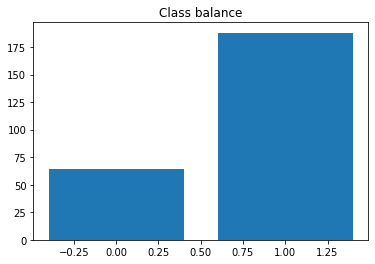

Majority class: 188
Minority class: 64
Proportion: 2.94 : 1


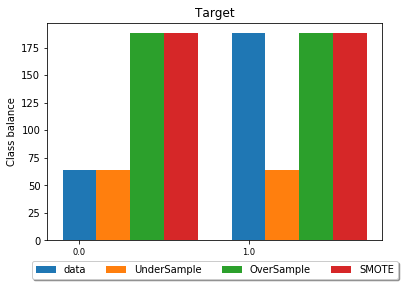

In [89]:
import numpy as np
import matplotlib.pyplot as plt



def multiple_bar_chart(ax: plt.Axes, xvalues: list, yvalues: dict, title: str, xlabel: str, ylabel: str, percentage=False):

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    x = np.arange(len(xvalues))  # the label locations
    ax.set_xticks(x)
    ax.set_xticklabels(xvalues, fontsize='small')
    if percentage:
        ax.set_ylim(0.0, 1.0)
    width = 0.8  # the width of the bars
    step = width / len(yvalues)
    k = 0
    for name, y in yvalues.items():
        ax.bar(x + k * step, y, step, label=name)
        k += 1
    ax.legend(loc='lower center', ncol=len(yvalues), bbox_to_anchor=(0.5, -0.2), fancybox = True, shadow = True)    



#Should have normalization and balancing...

#Balancing

unbal = data
target_count = unbal['class'].value_counts()
plt.figure()
plt.title('Class balance')
plt.bar(target_count.index, target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Majority class:', target_count[ind_min_class])
print('Minority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1')

##SMOTE

from imblearn.over_sampling import SMOTE, RandomOverSampler

RANDOM_STATE = 42
values = {'data': [target_count.values[ind_min_class], target_count.values[1-ind_min_class]]}

df_class_min = unbal[unbal['class'] == min_class]
df_class_max = unbal[unbal['class'] != min_class] 

df_under = df_class_max.sample(len(df_class_min))
values['UnderSample'] = [target_count.values[ind_min_class], len(df_under)]

df_over = df_class_min.sample(len(df_class_max), replace=True)
values['OverSample'] = [len(df_over), target_count.values[1-ind_min_class]]

smote = SMOTE(ratio='minority', random_state=RANDOM_STATE)

y = unbal.pop('class').values
X = unbal.values
smote_x, smote_y = smote.fit_sample(X, y)
smote_target_count = pd.Series(smote_y).value_counts()

#df_SMOTE = pd.concat([pd.DataFrame(smote_x), pd.DataFrame(smote_y)], axis=1)
df_SMOTE = pd.DataFrame(smote_x)
df_SMOTE.columns = unbal.columns
df_SMOTE['class'] = smote_y
#print(df_SMOTE.dtypes)
#print(smote_y)

values['SMOTE'] = [smote_target_count.values[ind_min_class], smote_target_count.values[1-ind_min_class]]

plt.figure()
multiple_bar_chart(plt.gca(), 
                        [target_count.index[ind_min_class], target_count.index[1-ind_min_class]], 
                        values, 'Target', 'frequency', 'Class balance')
plt.show()



In [90]:
import pandas as pd
from imblearn.over_sampling import SMOTE

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = pd.read_csv('pd_speech_features.csv', sep=',')
data = data.sort_values('id', ascending=True)
data = data.drop_duplicates(subset='id', keep='last')


data = data.groupby('id').mean().reset_index()

#Fazer a média das 3 medições
data = data.groupby('id').mean().reset_index()

X = data.drop(columns=['class'])
y = data['class'].values

smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_sample(X, y)

X_resampled = pd.DataFrame(X_resampled, columns=X.columns)

result = pd.concat([X_resampled, Y_resampled], axis=1, ignore_index=True)
result.columns = data.columns
print(result.shape)

#########
##########
result.describe(include ='all')
##########
##########
#This is the normalized dataset using SMOTE!

(376, 755)


,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,...,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000
mean,130.218053,0.472966,0.753854,0.689337,0.468310,340.627336,339.357086,0.006122,0.000366,0.001996,...,30.433060,22.999231,19.435229,13.316556,10.864066,10.371349,13.027139,13.143946,26.300511,0.500000
std,68.135053,0.487633,0.157316,0.065728,0.132442,107.269466,107.221342,0.001855,0.000693,0.002276,...,39.321714,28.754254,23.219947,17.629309,15.419567,13.545437,13.601829,12.637408,30.323515,0.500666
min,0.000000,0.000000,0.103480,0.543500,0.178730,80.000000,73.000000,0.002107,0.000014,0.000230,...,1.509800,1.531700,1.582900,2.120900,1.789500,1.884300,2.132600,2.148800,2.489600,0.000000
25%,74.750000,0.000000,0.773258,0.641900,0.370041,257.000000,256.000000,0.004739,0.000047,0.000820,...,3.046275,4.135325,4.005825,3.428755,3.269075,3.278150,4.084050,4.009525,4.253275,0.000000
50%,128.733996,0.119059,0.812410,0.681468,0.458002,328.500000,327.500000,0.005842,0.000072,0.001321,...,12.549950,9.941100,8.998254,5.528200,5.064204,5.162950,7.368650,7.304111,9.303200,0.500000
75%,187.968309,1.000000,0.831093,0.737322,0.552625,407.417666,406.417666,0.007293,0.000193,0.002115,...,46.303809,29.525110,24.904374,13.529901,9.726162,10.802075,15.673300,18.560011,40.647601,1.000000
max,251.000000,1.000000,0.907660,0.850700,0.849800,907.000000,905.000000,0.011601,0.003327,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.114200,61.379100,51.756300,120.317200,1.000000


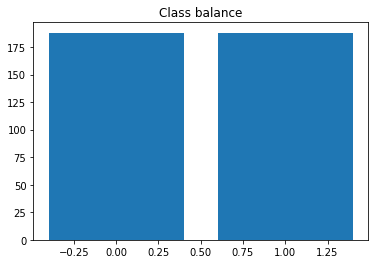

Majority class: 188
Minority class: 188
Proportion: 1.0 : 1


In [91]:
unbal = result
target_count = unbal['class'].value_counts()
plt.figure()
plt.title('Class balance')
plt.bar(target_count.index, target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Majority class:', target_count[ind_min_class])
print('Minority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1')


# Preprocessing 2nd Dataset

Name                                     Data Type    Measurement                       Description

Elevation                               quantitative    meters                       Elevation in meters
Aspect                                  quantitative    azimuth                      Aspect in degrees azimuth
Slope                                   quantitative    degrees                      Slope in degrees
Horizontal_Distance_To_Hydrology        quantitative    meters                       Horz Dist to nearest surface water features
Vertical_Distance_To_Hydrology          quantitative    meters                       Vert Dist to nearest surface water features
Horizontal_Distance_To_Roadways         quantitative    meters                       Horz Dist to nearest roadway
Hillshade_9am                           quantitative    0 to 255 index               Hillshade index at 9am, summer solstice
Hillshade_Noon                          quantitative    0 to 255 index               Hillshade index at noon, summer soltice
Hillshade_3pm                           quantitative    0 to 255 index               Hillshade index at 3pm, summer solstice
Horizontal_Distance_To_Fire_Points      quantitative    meters                       Horz Dist to nearest wildfire ignition points
Wilderness_Area (4 binary columns)      qualitative     0 (absence) or 1 (presence)  Wilderness area designation
Soil_Type (40 binary columns)           qualitative     0 (absence) or 1 (presence)  Soil Type designation
Cover_Type (7 types)                    integer         1 to 7                       Forest Cover Type designation




In [92]:
CTdata = pd.read_csv('covtype.csv', sep=',')

CTdata.shape


(581011, 55)

In [93]:
CTdata.head

<bound method NDFrame.head of         2596   51   3  258    0   510  221  232  148  6279  ...  0.34  0.35  \
0       2590   56   2  212   -6   390  220  235  151  6225  ...     0     0   
1       2804  139   9  268   65  3180  234  238  135  6121  ...     0     0   
2       2785  155  18  242  118  3090  238  238  122  6211  ...     0     0   
3       2595   45   2  153   -1   391  220  234  150  6172  ...     0     0   
4       2579  132   6  300  -15    67  230  237  140  6031  ...     0     0   
5       2606   45   7  270    5   633  222  225  138  6256  ...     0     0   
6       2605   49   4  234    7   573  222  230  144  6228  ...     0     0   
7       2617   45   9  240   56   666  223  221  133  6244  ...     0     0   
8       2612   59  10  247   11   636  228  219  124  6230  ...     0     0   
9       2612  201   4  180   51   735  218  243  161  6222  ...     0     0   
10      2886  151  11  371   26  5253  234  240  136  4051  ...     0     0   
11      2742  134  22 

In [95]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='constant', fill_value=-1, missing_values=np.nan, copy=True)
imp.fit(CTdata.values)
mat = imp.transform(CTdata.values)
data = pd.DataFrame(mat, columns=CTdata.columns)
data.describe(include='all')

,2596,51,3,258,0,510,221,232,148,6279,...,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,5
count,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,...,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000
mean,2959.365926,155.656988,14.103723,269.428236,46.418935,2350.149779,212.146033,223.318701,142.528253,1980.283828,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051465
std,279.984569,111.913733,7.488234,212.549538,58.295250,1559.254343,26.769909,19.768711,38.274561,1324.184340,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121792,1.396500
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [96]:
from sklearn.preprocessing import Normalizer

transf = Normalizer().fit(data)
norm_data = pd.DataFrame(transf.transform(data, copy=True), columns= data.columns)
norm_data.describe(include='all')

,2596,51,3,258,0,510,221,232,148,6279,...,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,5
count,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,...,581011.000000,581011.000000,5.810110e+05,5.810110e+05,5.810110e+05,5.810110e+05,581011.000000,581011.000000,581011.000000,581011.000000
mean,0.694705,0.037415,0.003527,0.062179,0.011274,0.473398,0.050413,0.053016,0.033865,0.412571,...,0.000022,0.000019,6.677510e-07,7.044198e-07,4.255639e-08,9.538992e-08,0.000005,0.000005,0.000003,0.000516
std,0.160143,0.030569,0.002546,0.049650,0.015207,0.214233,0.015350,0.014955,0.013812,0.187967,...,0.000071,0.000067,1.285552e-05,1.246340e-05,2.977421e-06,4.214799e-06,0.000033,0.000032,0.000026,0.000440
min,0.318474,0.000000,0.000000,0.000000,-0.059731,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000107
25%,0.577103,0.012761,0.001766,0.023677,0.001481,0.305075,0.038763,0.041632,0.024027,0.268354,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000240
50%,0.712996,0.029042,0.002902,0.050871,0.006471,0.477152,0.049253,0.052527,0.031884,0.411329,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000380
75%,0.821358,0.056179,0.004547,0.088353,0.016138,0.644977,0.059661,0.062571,0.041336,0.549669,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000570
max,0.992112,0.176776,0.023347,0.297469,0.150797,0.890341,0.126210,0.123664,0.123977,0.921661,...,0.000347,0.000379,3.636351e-04,2.842716e-04,2.240990e-04,2.167324e-04,0.000296,0.000298,0.000290,0.003028


In [97]:
from sklearn.preprocessing import OneHotEncoder

def dummify(df, cols_to_dummify):
    one_hot_encoder = OneHotEncoder(sparse=False)
    
    for var in cols_to_dummify:
        one_hot_encoder.fit(data[var].values.reshape(-1, 1))
        feature_names = one_hot_encoder.get_feature_names([var])
        transformed_data = one_hot_encoder.transform(data[var].values.reshape(-1, 1))
        df = pd.concat((df, pd.DataFrame(transformed_data, columns=feature_names)), 1)
        df.pop(var)
    return df
  
df = dummify(data, cols_sb.columns)
df.describe(include='all')

,2596,51,3,258,0,510,221,232,148,6279,...,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,5
count,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,...,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000
mean,2959.365926,155.656988,14.103723,269.428236,46.418935,2350.149779,212.146033,223.318701,142.528253,1980.283828,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051465
std,279.984569,111.913733,7.488234,212.549538,58.295250,1559.254343,26.769909,19.768711,38.274561,1324.184340,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121792,1.396500
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [98]:

#Should have normalization and balancing...

#Balancing

unbal = data
target_count = unbal['class'].value_counts()
plt.figure()
plt.title('Class balance')
plt.bar(target_count.index, target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Majority class:', target_count[ind_min_class])
print('Minority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1')

##SMOTE

from imblearn.over_sampling import SMOTE, RandomOverSampler

RANDOM_STATE = 42
values = {'data': [target_count.values[ind_min_class], target_count.values[1-ind_min_class]]}

df_class_min = unbal[unbal['class'] == min_class]
df_class_max = unbal[unbal['class'] != min_class] 

df_under = df_class_max.sample(len(df_class_min))
values['UnderSample'] = [target_count.values[ind_min_class], len(df_under)]

df_over = df_class_min.sample(len(df_class_max), replace=True)
values['OverSample'] = [len(df_over), target_count.values[1-ind_min_class]]

smote = SMOTE(ratio='minority', random_state=RANDOM_STATE)

y = unbal.pop('class').values
X = unbal.values
smote_x, smote_y = smote.fit_sample(X, y)
smote_target_count = pd.Series(smote_y).value_counts()

#df_SMOTE = pd.concat([pd.DataFrame(smote_x), pd.DataFrame(smote_y)], axis=1)
df_SMOTE = pd.DataFrame(smote_x)
df_SMOTE.columns = unbal.columns
df_SMOTE['class'] = smote_y
#print(df_SMOTE.dtypes)
#print(smote_y)

values['SMOTE'] = [smote_target_count.values[ind_min_class], smote_target_count.values[1-ind_min_class]]

plt.figure()
multiple_bar_chart(plt.gca(), 
                        [target_count.index[ind_min_class], target_count.index[1-ind_min_class]], 
                        values, 'Target', 'frequency', 'Class balance')
plt.show()



KeyError: 'class'